In [4]:
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

### Data (Iris Dataset)

In [5]:
review_data = pd.read_csv("D:/CSV files and Datasets/buddymove_holidayiq.csv")
#iris_data = iris_data.iloc[:, :-1]  #Variety column is removed as it will not be used
review_data.head()

,User Id,Sports,Religious,Nature,Theatre,Shopping,Picnic
0,User 1,2,77,79,69,68,95
1,User 2,2,62,76,76,69,68
2,User 3,2,50,97,87,50,75
3,User 4,2,68,77,95,76,61
4,User 5,2,98,54,59,95,86


### Visualizing the occurances of various values of attributes

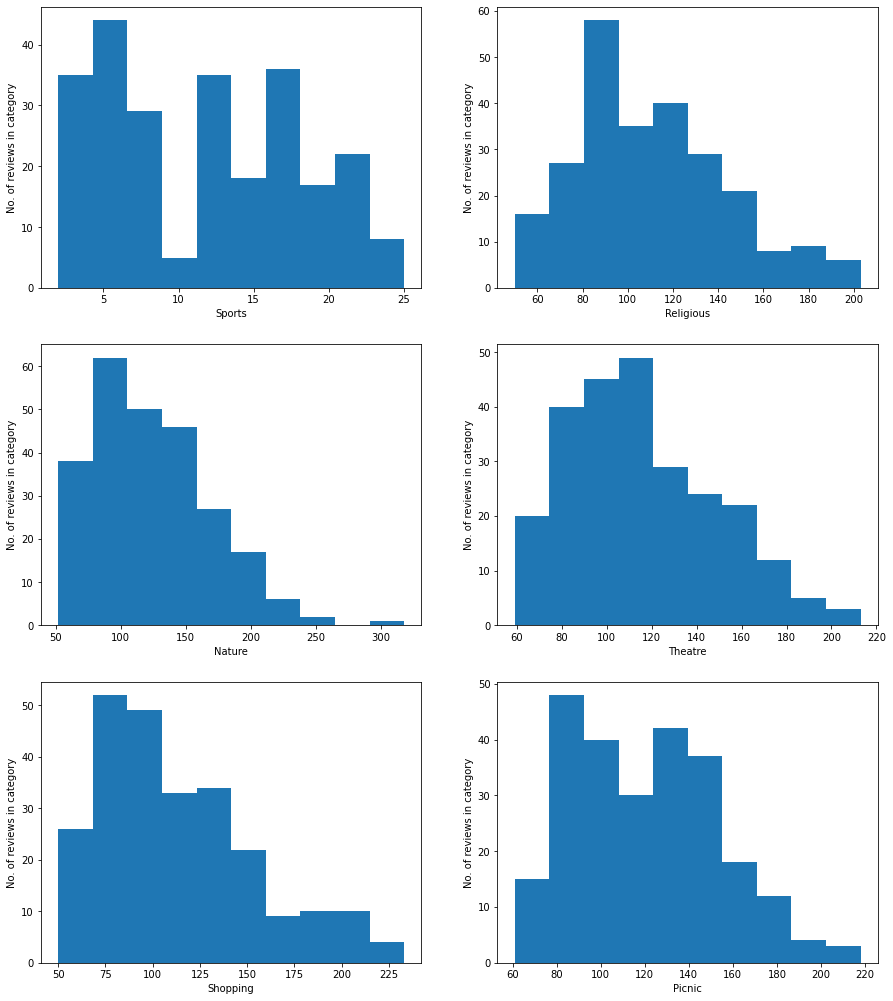

In [6]:
plt.figure(figsize=(15,30))
plt.title('Plot of frequecies of various iris attributes')

for i in range(1, 7):
    ax = plt.subplot(5, 2, i)
    ax.hist(review_data.iloc[:,i])
    ax.set_xlabel(review_data.columns[i])
    ax.set_ylabel('No. of reviews in category')

### Principal component analysis (PCA) of the dataset

Here we have calculated the principal components of the dataset which will help us in effective clustering.

In [7]:
pca = PCA(n_components=2)
pca_2_comp = pca.fit_transform(review_data.iloc[:,2:])
pca_review_data = pd.DataFrame(data=pca_2_comp, columns=['pc1', 'pc2'])
pca_review_data

,pc1,pc2
0,-74.101050,-42.203297
1,-92.214544,-47.875645
2,-103.895411,-17.441473
3,-83.175294,-46.244752
4,-53.227457,-80.054455
...,...,...
244,52.972825,27.547989
245,12.555508,104.973391
246,65.171805,41.998973
247,81.740970,40.865431


### Start of K-Means clustering

At first, we consider 4 arbitary points as centroids of 4 arbitary clusters, which are to be optimized using K-Means clustering.

Text(0.5, 1.0, 'Distribution of PCs of tourist reviews and assumed centroids')

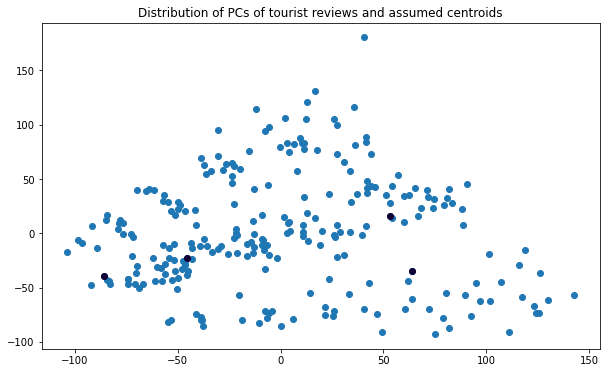

In [8]:
k = 4
centr = pca_review_data.sample(n=k)      #cent = centroids

plt.figure(figsize=(10,6))
plt.scatter(pca_review_data['pc1'], pca_review_data['pc2'])
plt.scatter(centr['pc1'], centr['pc2'], c='#120034')
plt.title('Distribution of PCs of tourist reviews and assumed centroids')

Then, we start the process of clustering to find the best suited clusters for each datapoint. The main idea is to reduce the distance between each datapoint and the corresponding cluster center. Here is a program to divide the dataset into 4 clusters, using K-means clustering.

### Program (K-Means clustering)

In [9]:
diff, j = 1, 0

while(diff!=0):
    data_copy = pca_review_data
    i = 1
    for id_1, row_cent in centr.iterrows():
        ed = []
        for id_2, row_data in data_copy.iterrows():
            d1 = (row_cent['pc1'] - row_data['pc1']) ** 2
            d2 = (row_cent['pc2'] - row_data['pc2']) ** 2
            d_points = (d1 + d2) ** 0.5
            ed.append(d_points)
        pca_review_data[i] = ed
        i += 1
    
    C = []
    for index, row in pca_review_data.iterrows():
        min_dist = row[1]
        pos = 1
        for i in range(k):
            if(row[i+1] < min_dist):
                min_dist = row[i+1]
                pos = i+1
        C.append(pos)
    
    pca_review_data['Cluster'] = C
    cent_new = pca_review_data.groupby('Cluster').mean()
    
    if(j==0):
        diff = 1
    else:
        diff = (cent_new['pc1'] - centr['pc1']).sum() + (cent_new['pc2'] - centr['pc2']).sum()
        print('Difference obtained in iteration '+ str(j)+' : '+str(diff.sum()))
    j += 1
    
    centr = pca_review_data.groupby(["Cluster"]).mean()
    
print("Done!\n")
print("Final Cetroids \n\n" + str(centr[['pc1', 'pc2']]))

Difference obtained in iteration 1 : 18.16489557121681
Difference obtained in iteration 2 : 19.69461329662521
Difference obtained in iteration 3 : 18.33815338002255
Difference obtained in iteration 4 : 17.093500608585842
Difference obtained in iteration 5 : 8.441044394154131
Difference obtained in iteration 6 : 6.853977222707147
Difference obtained in iteration 7 : 1.2054654855084976
Difference obtained in iteration 8 : 0.0
Done!

Final Cetroids 

               pc1        pc2
Cluster                      
1       -15.739234  13.988159
2       -56.644051 -34.841635
3        76.860072 -59.376761
4        37.586064  61.429560


### Plotting the centroids and their centers

Here we visualize the obtained clusters, by associating each principal component with it's alloted cluster.

Text(0.5, 1.0, 'Distribution of PCs of tourist reviews with clutering and final centroids')

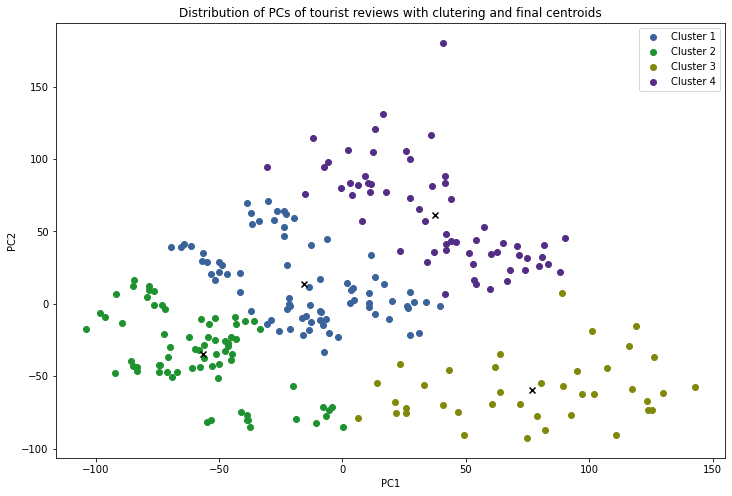

In [10]:
col = ['#3A639B', '#1D922F', '#81890B', '#542D87']

plt.figure(figsize=(12,8))
for i in range(k):
    data = pca_review_data[pca_review_data['Cluster'] == i+1]
    plt.scatter(data['pc1'], data['pc2'], c=col[i], label='Cluster {:g}'.format(i+1))

plt.scatter(centr['pc1'], centr['pc2'], c='k', marker='x')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.title('Distribution of PCs of tourist reviews with clutering and final centroids')

### The final dataset

We have obtained this final dataset by joining the original data with the clustering results, using the row index.

In [11]:
review_data['Cluster'] = pca_review_data['Cluster']
review_data.head()

,User Id,Sports,Religious,Nature,Theatre,Shopping,Picnic,Cluster
0,User 1,2,77,79,69,68,95,2
1,User 2,2,62,76,76,69,68,2
2,User 3,2,50,97,87,50,75,2
3,User 4,2,68,77,95,76,61,2
4,User 5,2,98,54,59,95,86,2


In [14]:
for i in range(0, 5):
    km = KMeans(n_clusters=4, random_state=i).fit(pca_review_data[['pc1', 'pc2']])
    review_data['C_by_sklearn'] = pd.DataFrame(km.predict(pca_review_data[['pc1', 'pc2']]) + 1)
    correct_pred = review_data[review_data['Cluster'] == review_data['C_by_sklearn']]
    print('Out of {0} rows, the algorithm gave correct results for {1} rows for random state : {2}.'
      .format(len(review_data), len(correct_pred), i))
    acc_p = (len(correct_pred) / len(review_data)) * 100
    print('Accuracy of the algorithm : {0} %\n'.format(acc_p))

Out of 249 rows, the algorithm gave correct results for 107 rows for random state : 0.
Accuracy of the algorithm : 42.971887550200805 %

Out of 249 rows, the algorithm gave correct results for 86 rows for random state : 1.
Accuracy of the algorithm : 34.53815261044177 %

Out of 249 rows, the algorithm gave correct results for 40 rows for random state : 2.
Accuracy of the algorithm : 16.06425702811245 %

Out of 249 rows, the algorithm gave correct results for 161 rows for random state : 3.
Accuracy of the algorithm : 64.65863453815261 %

Out of 249 rows, the algorithm gave correct results for 101 rows for random state : 4.
Accuracy of the algorithm : 40.562248995983936 %

